<a href="https://colab.research.google.com/github/Jinnie506/Hamoye-Data-Science/blob/main/StageEquiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from fbprophet import Prophet
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [86]:
df = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')

In [87]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [89]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [90]:
df["FullDate"] = pd.to_datetime(df["FullDate"])  ## convert column to datetime
df = df.set_index("FullDate")
daily_df = df.resample('D').sum()  ## Downsample to daily data points
daily_df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


**Question 11**

Text(0, 0.5, 'Electric Price')

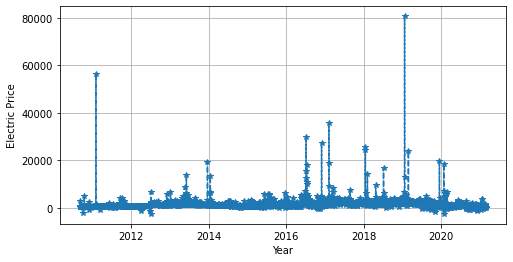

In [91]:
plt.figure(figsize=( 8 , 4 ))
plt.plot(daily_df.index, daily_df['ElecPrice'], '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Electric Price' )

**Question 12 & 13**

In [59]:
sysload_result = adfuller(daily_df['SysLoad'])
gasprice_result = adfuller(daily_df['GasPrice'])

Q12 Answer:

In [61]:
round(sysload_result[1],6)

0.004254

In [62]:
round(gasprice_result[1],6)

0.045027

In [83]:
elec_result = adfuller(daily_df['ElecPrice'])

Q13 Answer:

In [84]:
print('Critical Values:')
print(f'10% of GasPrice : {round(gasprice_result[4]["10%"],4)}')
print(f'5% of GasPrice : {round(elec_result[4]["5%"],4)}')

Critical Values:
10% of GasPrice : -2.5672
5% of GasPrice : -2.8623


**Questions 14, 15 and 16**

In [66]:
train_data = daily_df.iloc[:2757,:]
test_data = daily_df.iloc[2757:,:]
train_data.shape , test_data.shape

((2757, 4), (1077, 4))

In [67]:
train_data.reset_index(inplace = True)
df_train = train_data.iloc[:,[0,-1]]
df_train = df_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [68]:
test_data.reset_index(inplace = True)
test_df = test_data.iloc[:,[0,-1]]
test_df = test_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
test_df.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [39]:
model = Prophet()
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
forecast_values = model.predict(test_df) 
forecast_values.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,162.016898,4953.798715,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,317.881296,5099.715648,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,529.752157,5287.046488,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,168.650740,5078.341136,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-108.482911,4565.901329,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [41]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

Q14 Answer:

In [42]:
MAPE = Metric(test_df['y'],forecast_values['yhat'])
round(MAPE,2)

549.48

Q15 Answer:

In [43]:
RMSE = np.sqrt(metrics.mean_squared_error(test_df['y'],forecast_values['yhat']))
round(RMSE,4)

3218.1558

Q16 Answer:

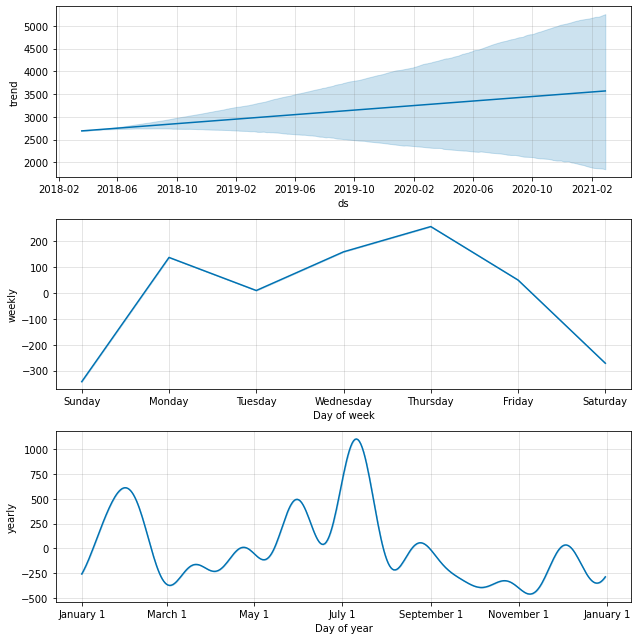

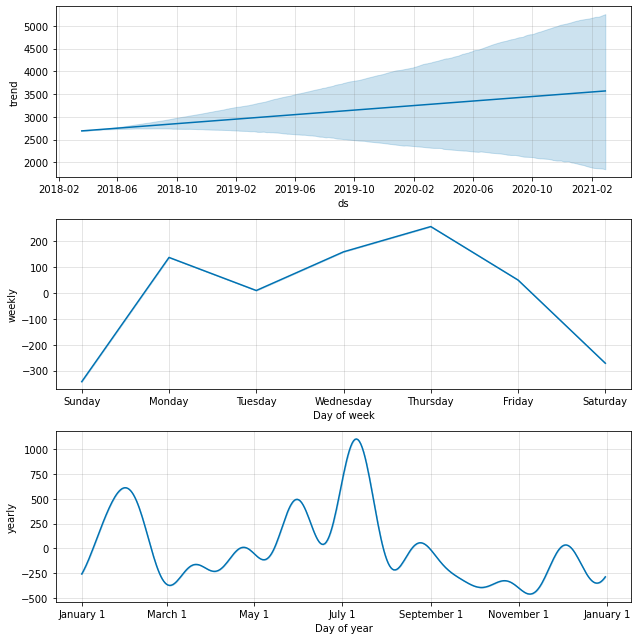

In [44]:
model.plot_components(forecast_values)

**Questions 17, 18 and 19**

In [69]:
daily_df.reset_index(inplace=True)
daily_df2 = daily_df.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3',
                                           'ElecPrice':'y'})
daily_df2.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [70]:
train_data2 = daily_df2.iloc[:2757,:]
test_data2 = daily_df2.iloc[2757:,:]

In [71]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

In [72]:
model = model.fit(train_data2)
forecast_values2 = model.predict(test_data2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Q17 Answer:

In [73]:
MAPE = Metric(test_data2['y'],forecast_values2['yhat'])
round(MAPE,2)

233.74

Q18 Answer:

In [74]:
RMSE = np.sqrt(metrics.mean_squared_error(test_data2['y'],forecast_values2['yhat']))
round(RMSE,2)

2709.65

Q19 Answer:

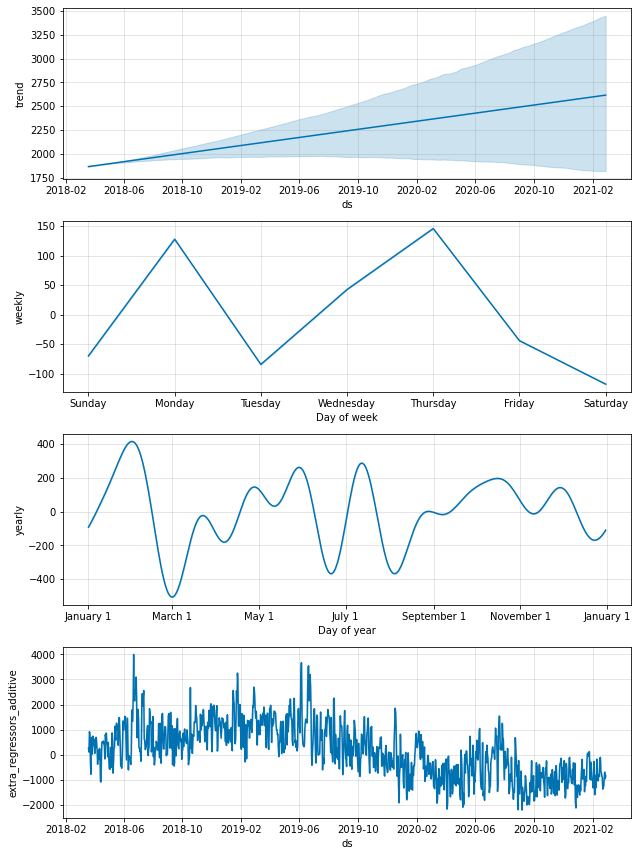

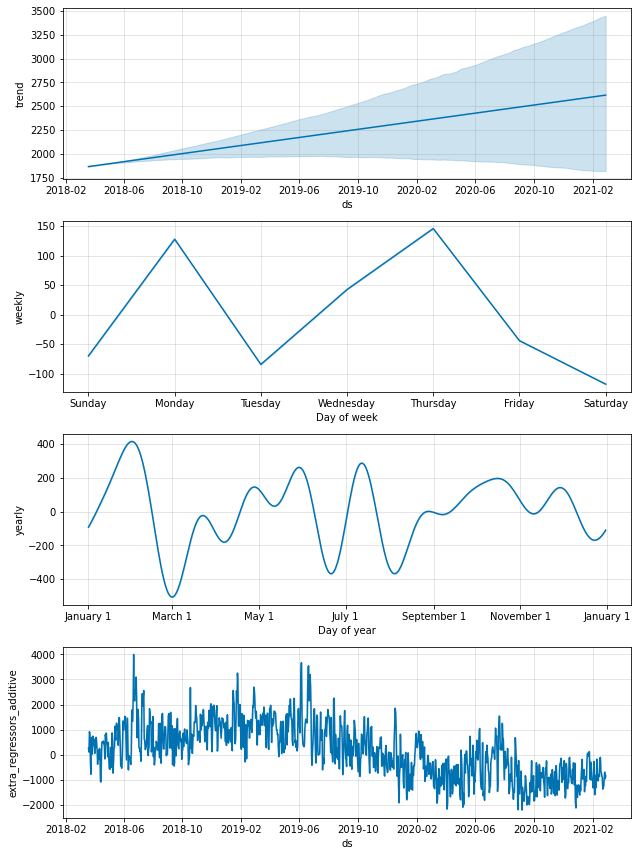

In [52]:
model.plot_components(forecast_values2)

**Question 20**

In [75]:
daily_df.head(3)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.700
1,2010-09-02,369.6,38898.99,88.56,570.810
2,2010-09-03,439.2,41665.76,106.80,504.975


In [76]:
train_data3 = daily_df.iloc[:2757,:]
test_data3 = daily_df.iloc[2757:,:]

In [77]:
df_train3 = train_data3.iloc[:,[0,2,3,4]]
df_test3 = test_data3.iloc[:,[0,2,3,4]]

In [79]:
df_train3 = df_train3.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
df_test3 = df_test3.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
df_train3.head(3)

,ds,add1,add2,y
0,2010-09-01,41565.38,88.56,2751.700
1,2010-09-02,38898.99,88.56,570.810
2,2010-09-03,41665.76,106.80,504.975


In [80]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')

In [81]:
model = model.fit(df_train3)
forecast_values_new = model.predict(df_test3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Q20 Answer:

In [82]:
MAPE = Metric(df_test3['y'],forecast_values_new['yhat'])
round(MAPE,2)

236.66